<a href="https://colab.research.google.com/github/hannaa-n/CS-491/blob/main/CS491_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lexical Dispersion Plot

In [1]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset
from collections import Counter

from datetime import datetime, timedelta

import nltk
from nltk.draw.dispersion import dispersion_plot

## Load the dataset

In [35]:
# Load the dataset
dataset = load_dataset("jsulz/state-of-the-union-addresses")

# Extract the necessary columns
dates = [item["date"] for item in dataset["train"]]
potus=[item["potus"] for item in dataset["train"]]
texts = [item["lemmatized"] for item in dataset["train"]]

# Combine dates, potus texts, then sort by dates
sorted_data = sorted(zip(dates, potus, texts), key=lambda x: x[0])
sorted_dates, sorted_potus,sorted_texts = zip(*sorted_data)

## Step 1: Partition the data into 5-year blocks

In [36]:
start_date = pd.Timestamp('1790-01-08')
blocks = []
current_block = []
current_date = start_date

for date, potus, text in zip(sorted_dates, sorted_potus, sorted_texts):
    date = pd.Timestamp(date)
    if date < current_date + timedelta(days=365*5):
        current_block.append((date, potus, text))
    else:
        blocks.append(current_block)
        current_block = [(date, potus, text)]
        current_date = date
blocks.append(current_block)  # Append the last block

## Step 2: Restructure blocks into dictionaries

In [37]:
processed_blocks = []
for block in blocks:
    year = block[0][0].year  # Extract year from the first entry's date
    merged_text = [word for entry in block for word in entry[2]]
    processed_blocks.append({"year": year, "text": merged_text})

## Step 3: Pad with "OOV" tokens

In [38]:
max_len = max(len(block["text"]) for block in processed_blocks)

for block in processed_blocks:
    block["text"] += ["OOV"] * (max_len - len(block["text"]))

## Step 4: Produce the lexical dispersion plot

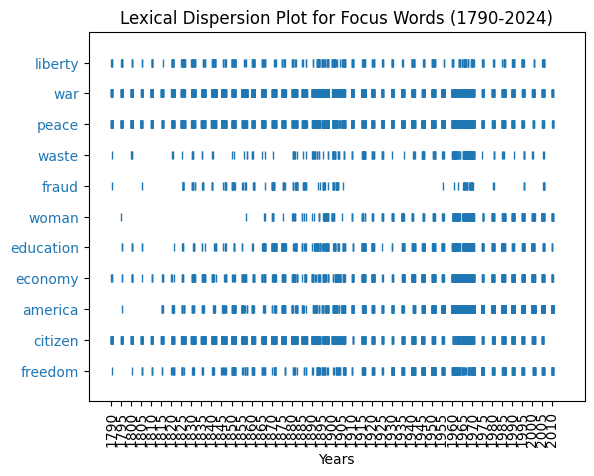

In [41]:
all_words = [word for block in processed_blocks for word in block["text"]]
target_words = ["liberty", "war", "peace", "waste", "fraud", "woman", "education", "economy", "america", "citizen", "freedom"]

year_labels = [start_date.year + i * 5 for i in range(len(processed_blocks))]

# I tried to use 'plt.figure(figsize=(20, 10))' but it doesn't adjust the horizontal of the plot
# plt.figure(figsize=(20, 10))

dispersion_plot(all_words, target_words)
plt.title("Lexical Dispersion Plot for Focus Words (1790-2024)")
x_tick_positions = range(len(all_words))
x_tick_positions = x_tick_positions[::len(all_words) // len(year_labels)]
plt.xticks(x_tick_positions, year_labels, rotation=90)
plt.xlabel("Years")
plt.show()